<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/validation_curves_for_polynomial_reg_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple test for "validation curves"
* credits : Jake VanderPlas

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the model and creatig the model pipeline with the polymial preprocessor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#define the pipeline 
def polynomialRegression(degree = 2,**kwargs):
  '''
  creates a polynomial regerssor with a dregree parameter. default degree = 2
  '''
  return make_pipeline(PolynomialFeatures(degree),
                       LinearRegression(**kwargs))


In [15]:
#create some data 
def make_data(N,err=1.0,r_seed=1):
  #randomly sample the data 
  rng = np.random.RandomState(r_seed)
  X = rng.rand(N,1)**2
  y = 10 - 1./(X.ravel() + 0.1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y
X, y = make_data(40)

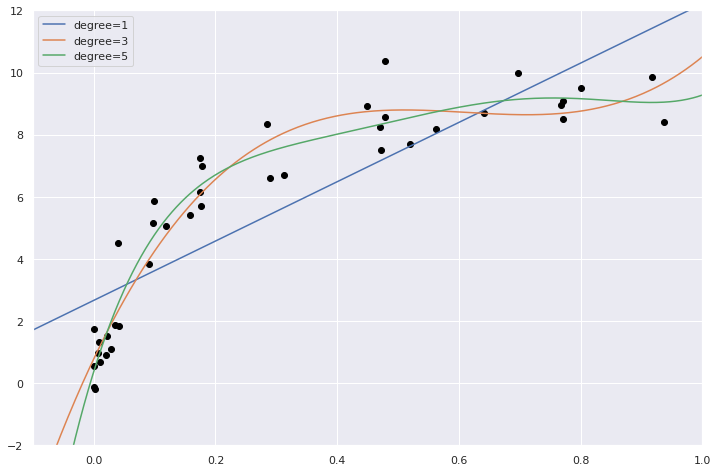

In [20]:
 plt.figure(figsize=(12,8))
 import matplotlib.pyplot as plt
 import seaborn; seaborn.set() # plot formatting
 X_test = np.linspace(-0.1, 1.1, 500)[:, None]
 plt.scatter(X.ravel(), y, color='black')
 axis = plt.axis()
 for degree in [1, 3, 5]:
   y_test = polynomialRegression(degree).fit(X, y).predict(X_test)
   plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
   
 plt.xlim(-0.1, 1.0)
 plt.ylim(-2, 12)
 plt.legend(loc='best');